# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

Biblioteca de importação

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Fixing random state for reproducibility
np.random.seed(2360873)

Carregando o arquivo 

In [3]:
df_previsao_renda = pd.read_csv('previsao_de_renda.csv')

In [4]:
# contagem de linhas e colunas do dataframe
df_previsao_renda.shape

(15000, 16)

In [5]:
# visualização das colunas e uma amostra de seus respectivos dados no dataframe
df_previsao_renda.head(2)

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14


In [6]:
# visualização das variáveis categóricas 
df_previsao_renda.select_dtypes(include=['bool','object']).head(1)

,data_ref,sexo,posse_de_veiculo,posse_de_imovel,tipo_renda,educacao,estado_civil,tipo_residencia,mau
0,2015-01-01,F,False,True,Assalariado,Secundário,Casado,Casa,False


In [7]:
# visualização das datas presentes no dataframe
df_previsao_renda.data_ref.unique()

array(['2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
       '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
       '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
       '2016-01-01', '2016-02-01', '2016-03-01'], dtype=object)

Preparação da base de dados

Para comparação das variáveis ao longo de tempo, refaremos uma amostragem dos dados a partir de uma simulação das datas em um ano.

In [8]:
n_meses = 12
n_linhas = 1500

datas = pd.Series(pd.date_range('1/1/2015', periods = n_meses, freq = 'MS').repeat(n_linhas))

dados = df_previsao_renda.sample(n = n_meses * n_linhas, replace=True).reset_index()

df_renda_2 = pd.concat([datas, dados], axis = 1)
df_renda_2.rename({0:'datas_simuladas'}, inplace = True, axis = 'columns')
df_renda_2

,datas_simuladas,level_0,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,2015-01-01,10775,10775,2015-11-01,13159,M,True,False,1,Empresário,Superior completo,Casado,Casa,44,3.838356,3.0,False,25971.93
1,2015-01-01,13028,13028,2016-02-01,737,F,False,True,1,Assalariado,Superior completo,Casado,Casa,48,19.369863,3.0,False,13398.09
2,2015-01-01,1775,1775,2015-02-01,9818,F,False,False,2,Servidor público,Secundário,Casado,Casa,28,5.430137,4.0,False,6876.78
3,2015-01-01,7614,7614,2015-08-01,10912,M,True,False,0,Empresário,Secundário,Casado,Casa,49,14.273973,2.0,False,5732.37
4,2015-01-01,3485,3485,2015-04-01,10448,F,False,True,0,Assalariado,Secundário,Viúvo,Casa,35,6.216438,1.0,False,2252.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,2015-12-01,8894,8894,2015-09-01,11114,M,True,True,0,Assalariado,Superior completo,Casado,Casa,31,6.761644,2.0,False,9238.55
17996,2015-12-01,8694,8694,2015-09-01,12204,M,False,True,2,Servidor público,Superior completo,Casado,Casa,39,21.693151,4.0,False,2617.26
17997,2015-12-01,9604,9604,2015-10-01,4510,F,False,False,0,Assalariado,Secundário,Casado,Governamental,45,27.364384,2.0,False,1576.31
17998,2015-12-01,4190,4190,2015-05-01,15213,M,False,True,1,Assalariado,Secundário,Solteiro,Casa,33,3.369863,2.0,False,2688.08


Avaliação da distribuição 

Definindo uma função para plotagem do gráfico de barras que visualize uma variável qualitativa ao longo do tempo

In [9]:
def plot_graf_barr (x, hue, data):
    ax = sns.countplot(x=x,  hue=hue, data=data)
    tick_labs = df_renda_2[x].map(lambda ts: ts.strftime("%m-%Y")).unique()
    ticks = ax.set_xticks(list(range(df_renda_2[x].nunique())))
    labels = ax.set_xticklabels(tick_labs, rotation=90)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

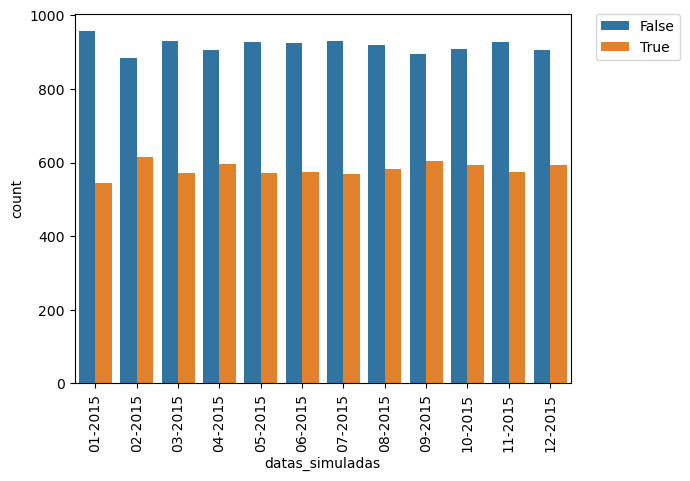

In [10]:
plot_graf_barr('datas_simuladas', 'posse_de_veiculo', df_renda_2)

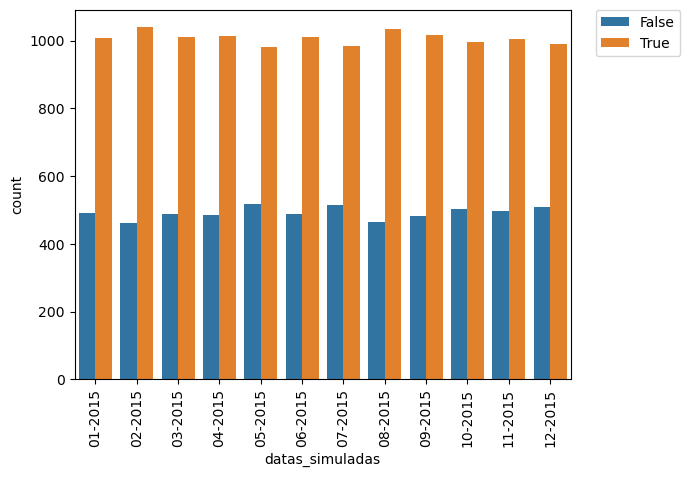

In [11]:
plot_graf_barr('datas_simuladas', 'posse_de_imovel', df_renda_2)

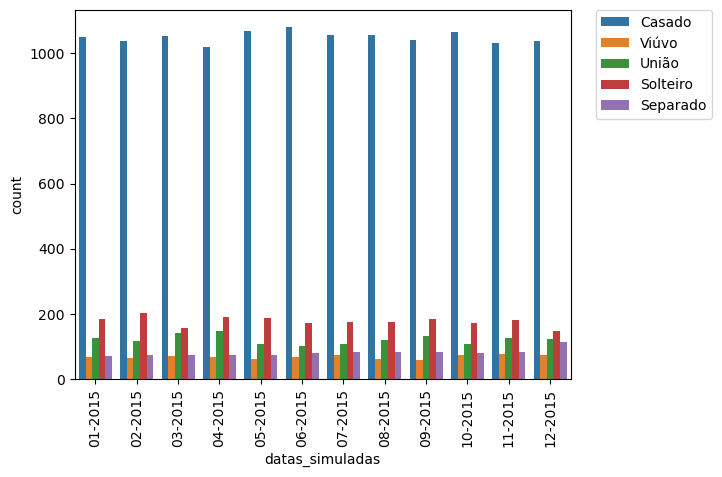

In [12]:
plot_graf_barr('datas_simuladas', 'estado_civil', df_renda_2)

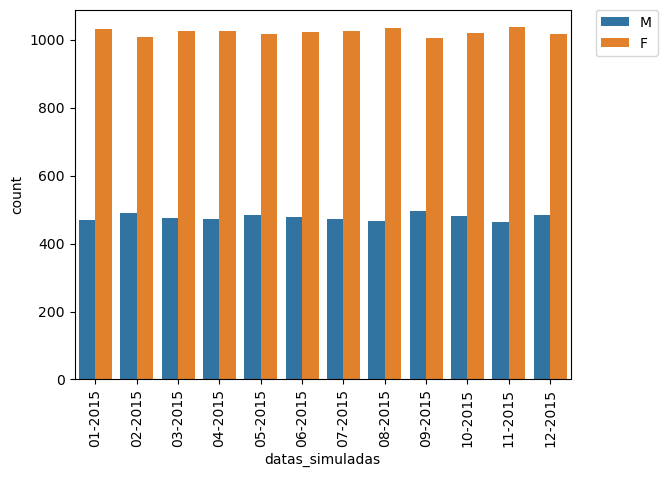

In [13]:
plot_graf_barr('datas_simuladas', 'sexo', df_renda_2)

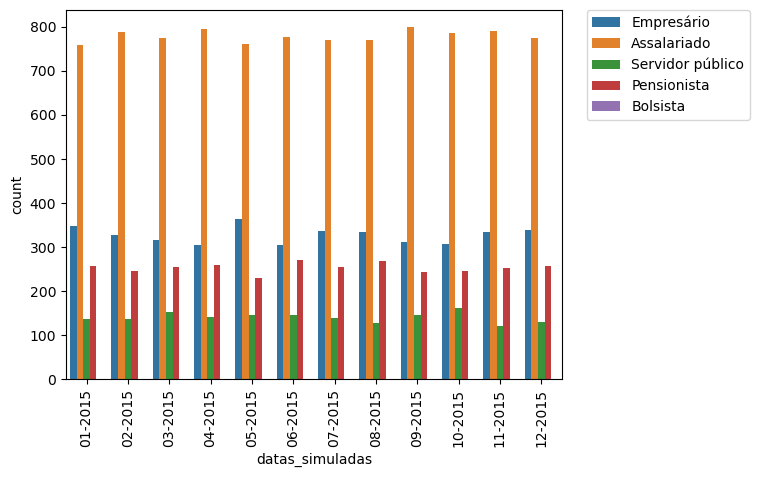

In [14]:
plot_graf_barr('datas_simuladas', 'tipo_renda', df_renda_2)

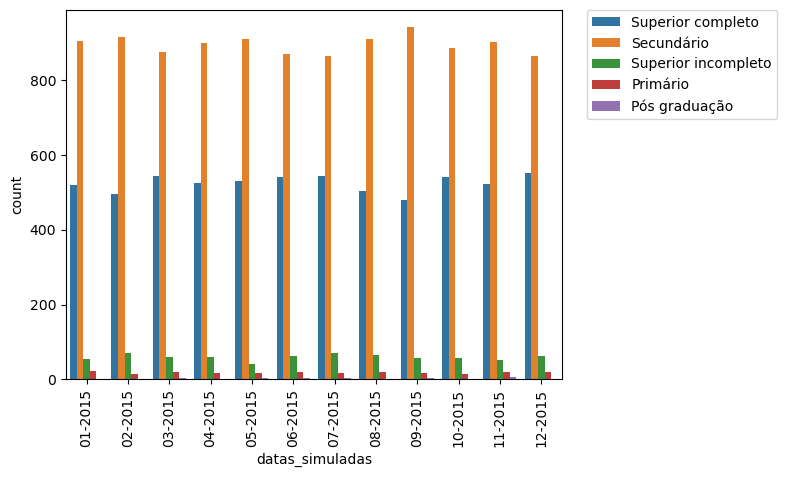

In [15]:
plot_graf_barr('datas_simuladas', 'educacao', df_renda_2)

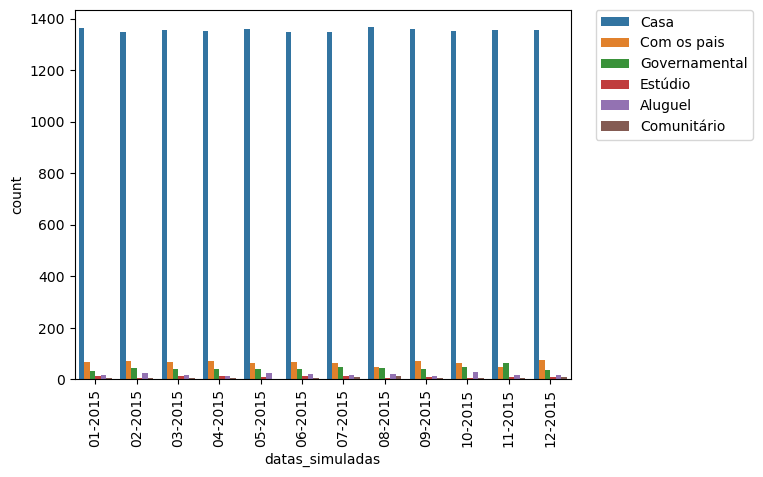

In [16]:
plot_graf_barr('datas_simuladas', 'tipo_residencia', df_renda_2)

2) Para cada variável quantitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

In [17]:
#visualização das variáveis numéricas
df_previsao_renda.select_dtypes(exclude=['bool','object']).head(1)

,Unnamed: 0,index,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,8682,1,36,3.575342,3.0,3369.24


In [18]:
def plot_graf(x, y, hue, data):
    ax = sns.pointplot(x=x, y=y, hue=hue, data=data, dodge=True)
    plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.30),ncol = 3)
    tick_labs = data[x].map(lambda ts: ts.strftime("%m-%Y")).unique()
    ticks = ax.set_xticks(list(range(data[x].nunique())))
    labels = ax.set_xticklabels(tick_labs, rotation=90)
    plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.50),ncol = 3)

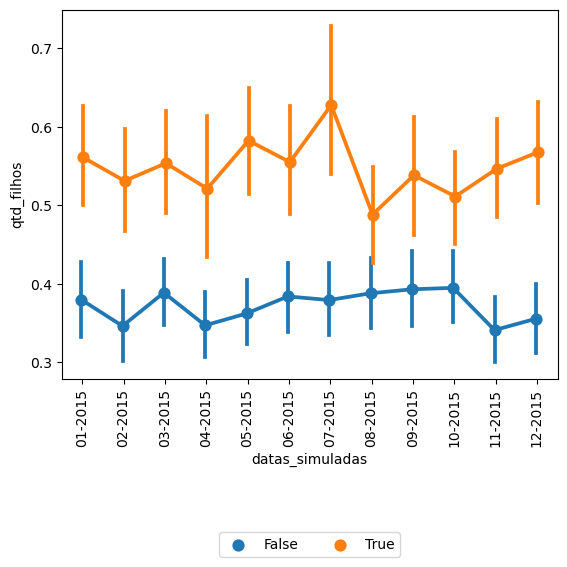

In [19]:
plot_graf('datas_simuladas', 'qtd_filhos', 'posse_de_veiculo', df_renda_2)

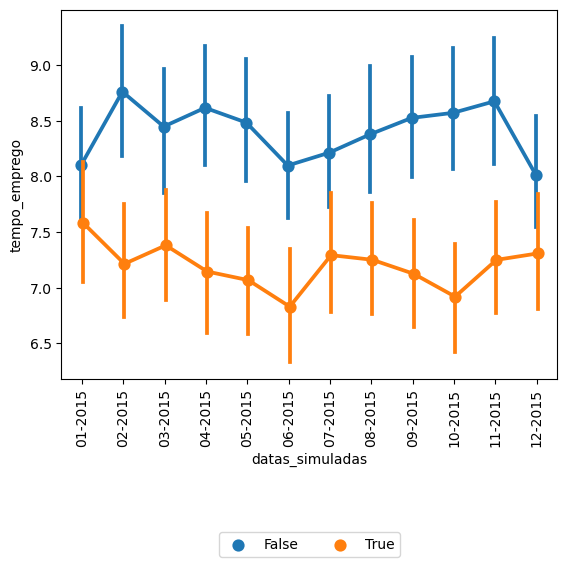

In [20]:
plot_graf('datas_simuladas', 'tempo_emprego', 'posse_de_veiculo', df_renda_2)

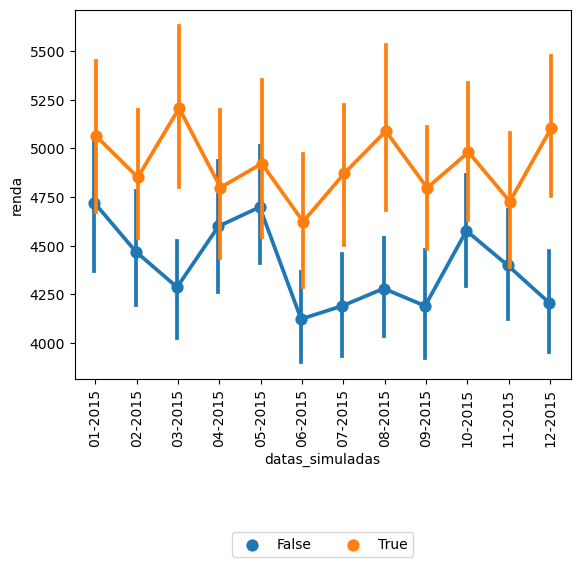

In [21]:
plot_graf('datas_simuladas', 'renda', 'posse_de_veiculo', df_renda_2)

#### Insight 

As médias das variáveis numéricas se mostraram estavéis no tempo, sem alterações significativas entre suas médias.